# ML ANALYSIS ON AQI USING DECISION TREE ALGO

In [1]:
# Importing Liabraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # y=mx+c
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels

In [ ]:
# Loading the data

In [2]:
df=pd.read_csv("C:/Users/admin/Desktop/filesdata/station_day.csv")

In [3]:
df

StationId        Date  PM2.5    PM10    NO    NO2    NOx    NH3    CO  \
0         AP001  2017-11-24  71.36  115.75  1.75  20.65  12.40  12.19  0.10   
1         AP001  2017-11-25  81.40  124.50  1.44  20.50  12.08  10.72  0.12   
2         AP001  2017-11-26  78.32  129.06  1.26  26.00  14.85  10.28  0.14   
3         AP001  2017-11-27  88.76  135.32  6.60  30.85  21.77  12.91  0.11   
4         AP001  2017-11-28  64.18  104.09  2.56  28.07  17.01  11.42  0.09   
...         ...         ...    ...     ...   ...    ...    ...    ...   ...   
99716     WB013  2020-04-27  11.51   31.71  1.73  10.21  11.93  21.52  0.54   
99717     WB013  2020-04-28   9.38   33.70  1.77  12.39  14.15  22.44  0.64   
99718     WB013  2020-04-29  16.86   32.17  2.00  14.26  16.27  24.19  0.57   
99719     WB013  2020-04-30  15.17   32.10  2.02  12.40  14.41  25.58  0.61   
99720     WB013  2020-05-01  17.05   29.15  1.70  10.54  12.22  24.21  0.65   

         SO2      O3  Benzene  Toluene  Xylene    AQI    AQI_Bucket  
0      10.76  109.26     0.17     5.92    0.10    NaN           NaN  
1      15.24  127.09     0.20     6.50    0.06  184.0      Moderate  
2      26.96  117.44     0.22     7.95    0.08  197.0      Moderate  
3      33.59  111.81     0.29     7.63    0.12  198.0      Moderate  
4      19.00  138.18     0.17     5.02    0.07  188.0      Moderate  
...      ...     ...      ...      ...     ...    ...           ...  
99716   6.92   28.90     1.33     8.96     NaN   38.0          Good  
99717   6.09   26.34     1.35     9.47     NaN   39.0          Good  
99718   7.27   29.62     1.66    10.45     NaN   44.0          Good  
99719  11.53   33.93     0.96     8.92     NaN   46.0          Good  
99720   6.51   23.48     0.77     7.91     NaN   57.0  Satisfactory  

[99721 rows x 16 columns]

In [4]:
df.drop(['AQI_Bucket','Xylene','Benzene','Date','StationId'], axis=1,inplace=True)

In [5]:
df

PM2.5    PM10    NO    NO2    NOx    NH3    CO    SO2      O3  Toluene  \
0      71.36  115.75  1.75  20.65  12.40  12.19  0.10  10.76  109.26     5.92   
1      81.40  124.50  1.44  20.50  12.08  10.72  0.12  15.24  127.09     6.50   
2      78.32  129.06  1.26  26.00  14.85  10.28  0.14  26.96  117.44     7.95   
3      88.76  135.32  6.60  30.85  21.77  12.91  0.11  33.59  111.81     7.63   
4      64.18  104.09  2.56  28.07  17.01  11.42  0.09  19.00  138.18     5.02   
...      ...     ...   ...    ...    ...    ...   ...    ...     ...      ...   
99716  11.51   31.71  1.73  10.21  11.93  21.52  0.54   6.92   28.90     8.96   
99717   9.38   33.70  1.77  12.39  14.15  22.44  0.64   6.09   26.34     9.47   
99718  16.86   32.17  2.00  14.26  16.27  24.19  0.57   7.27   29.62    10.45   
99719  15.17   32.10  2.02  12.40  14.41  25.58  0.61  11.53   33.93     8.92   
99720  17.05   29.15  1.70  10.54  12.22  24.21  0.65   6.51   23.48     7.91   

         AQI  
0        NaN  
1      184.0  
2      197.0  
3      198.0  
4      188.0  
...      ...  
99716   38.0  
99717   39.0  
99718   44.0  
99719   46.0  
99720   57.0  

[99721 rows x 11 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99721 entries, 0 to 99720
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    78984 non-null  float64
 1   PM10     58700 non-null  float64
 2   NO       83444 non-null  float64
 3   NO2      83957 non-null  float64
 4   NOx      84806 non-null  float64
 5   NH3      53910 non-null  float64
 6   CO       87230 non-null  float64
 7   SO2      75744 non-null  float64
 8   O3       75213 non-null  float64
 9   Toluene  63456 non-null  float64
 10  AQI      79593 non-null  float64
dtypes: float64(11)
memory usage: 8.4 MB


In [7]:
df.shape

(99721, 11)

In [8]:
df.isnull().sum()

PM2.5      20737
PM10       41021
NO         16277
NO2        15764
NOx        14915
NH3        45811
CO         12491
SO2        23977
O3         24508
Toluene    36265
AQI        20128
dtype: int64

In [1]:
# DATA FEATURING

In [9]:
#data=df.fillna(method="bfill")
df['PM2.5'].fillna(df['PM2.5'].mean(), axis=0, inplace=True)
df['NO'].fillna(df['NO'].mean(), axis=0, inplace=True)
df['NO2'].fillna(df['NO2'].mean(), axis=0, inplace=True)
df['NOx'].fillna(df['NOx'].mean(), axis=0, inplace=True)
df['NH3'].fillna(df['NH3'].mean(), axis=0, inplace=True)
df['CO'].fillna(df['CO'].mean(), axis=0, inplace=True)
df['SO2'].fillna(df['SO2'].mean(), axis=0, inplace=True)
df['Toluene'].fillna(df['Toluene'].mean(), axis=0, inplace=True)
df['O3'].fillna(df['O3'].mean(), axis=0, inplace=True)
df['AQI'].fillna(df['AQI'].mean(), axis=0, inplace=True)
df['PM10'].fillna(df['PM10'].mean(), axis=0, inplace=True)
## let's fill with the mean

In [10]:
df

PM2.5    PM10    NO    NO2    NOx    NH3    CO    SO2      O3  Toluene  \
0      71.36  115.75  1.75  20.65  12.40  12.19  0.10  10.76  109.26     5.92   
1      81.40  124.50  1.44  20.50  12.08  10.72  0.12  15.24  127.09     6.50   
2      78.32  129.06  1.26  26.00  14.85  10.28  0.14  26.96  117.44     7.95   
3      88.76  135.32  6.60  30.85  21.77  12.91  0.11  33.59  111.81     7.63   
4      64.18  104.09  2.56  28.07  17.01  11.42  0.09  19.00  138.18     5.02   
...      ...     ...   ...    ...    ...    ...   ...    ...     ...      ...   
99716  11.51   31.71  1.73  10.21  11.93  21.52  0.54   6.92   28.90     8.96   
99717   9.38   33.70  1.77  12.39  14.15  22.44  0.64   6.09   26.34     9.47   
99718  16.86   32.17  2.00  14.26  16.27  24.19  0.57   7.27   29.62    10.45   
99719  15.17   32.10  2.02  12.40  14.41  25.58  0.61  11.53   33.93     8.92   
99720  17.05   29.15  1.70  10.54  12.22  24.21  0.65   6.51   23.48     7.91   

              AQI  
0      187.122347  
1      184.000000  
2      197.000000  
3      198.000000  
4      188.000000  
...           ...  
99716   38.000000  
99717   39.000000  
99718   44.000000  
99719   46.000000  
99720   57.000000  

[99721 rows x 11 columns]

In [11]:
df.isnull().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Toluene    0
AQI        0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99721 entries, 0 to 99720
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    99721 non-null  float64
 1   PM10     99721 non-null  float64
 2   NO       99721 non-null  float64
 3   NO2      99721 non-null  float64
 4   NOx      99721 non-null  float64
 5   NH3      99721 non-null  float64
 6   CO       99721 non-null  float64
 7   SO2      99721 non-null  float64
 8   O3       99721 non-null  float64
 9   Toluene  99721 non-null  float64
 10  AQI      99721 non-null  float64
dtypes: float64(11)
memory usage: 8.4 MB


In [13]:
data= df.astype(int)

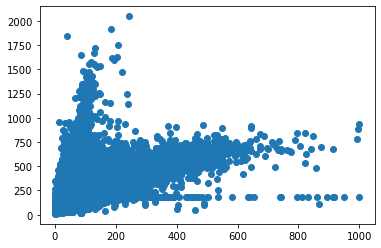

In [14]:
plt.scatter(df['PM2.5'],df["AQI"])

In [15]:
df.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  99721.000000  99721.000000  99721.000000  99721.000000  99721.000000   
mean      84.390447    165.866365     24.198023     36.478133     42.960215   
std       69.780083     96.797033     32.229139     27.631382     42.625622   
min        0.020000      0.010000      0.010000      0.010000      0.000000   
25%       40.210000    111.430000      6.210000     17.940000     16.970000   
50%       77.930000    165.866365     14.800000     34.440000     34.760000   
75%       88.730000    165.866365     24.198023     43.740000     47.010000   
max     1000.000000   1000.000000    470.000000    448.050000    467.630000   

                NH3            CO           SO2            O3       Toluene  \
count  99721.000000  99721.000000  99721.000000  99721.000000  99721.000000   
mean      30.009551      1.683029     12.397799     38.182154     15.888183   
std       18.643710      4.255989     11.576027     34.850868     24.101441   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%       23.170000      0.610000      6.190000     22.810000      2.180000   
50%       30.009551      1.070000     12.300000     38.182154     15.888183   
75%       30.009551      1.683029     12.600000     40.540000     15.888183   
max      418.900000    175.810000    195.650000    963.000000    454.850000   

                AQI  
count  99721.000000  
mean     187.122347  
std      119.664237  
min        8.000000  
25%      101.000000  
50%      187.122347  
75%      224.000000  
max     2049.000000

PM10,NH3,Toluene ,AQI ,PM2.5, are not standarized   as there is large diff between std and mean

In [16]:
# Check for liniearity
df.corr()

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PM2.5    1.000000  0.690320  0.462676  0.411655  0.430798  0.324872  0.075331   
PM10     0.690320  1.000000  0.458365  0.394085  0.449619  0.347858  0.079820   
NO       0.462676  0.458365  1.000000  0.573514  0.832555  0.283246  0.114864   
NO2      0.411655  0.394085  0.573514  1.000000  0.682007  0.311545  0.160986   
NOx      0.430798  0.449619  0.832555  0.682007  1.000000  0.284117  0.118381   
NH3      0.324872  0.347858  0.283246  0.311545  0.284117  1.000000  0.048572   
CO       0.075331  0.079820  0.114864  0.160986  0.118381  0.048572  1.000000   
SO2      0.162725  0.189654  0.167766  0.269837  0.192634  0.068671  0.355516   
O3       0.122640  0.032458  0.020920  0.213373  0.098184  0.092512  0.007973   
Toluene  0.240445  0.264484  0.243421  0.250956  0.229906  0.139939  0.102318   
AQI      0.778935  0.694783  0.455551  0.459743  0.453381  0.305375  0.401870   

              SO2        O3   Toluene       AQI  
PM2.5    0.162725  0.122640  0.240445  0.778935  
PM10     0.189654  0.032458  0.264484  0.694783  
NO       0.167766  0.020920  0.243421  0.455551  
NO2      0.269837  0.213373  0.250956  0.459743  
NOx      0.192634  0.098184  0.229906  0.453381  
NH3      0.068671  0.092512  0.139939  0.305375  
CO       0.355516  0.007973  0.102318  0.401870  
SO2      1.000000  0.126084  0.181355  0.349976  
O3       0.126084  1.000000  0.076820  0.157773  
Toluene  0.181355  0.076820  1.000000  0.260872  
AQI      0.349976  0.157773  0.260872  1.000000

PM2.5,PM10, ARE only good in showing linear

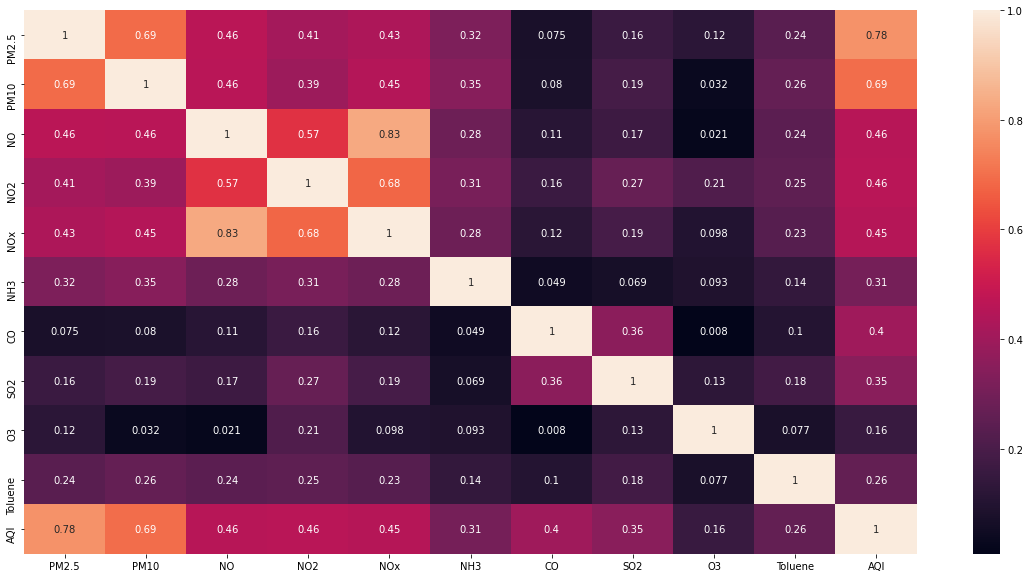

In [17]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)
plt.show()

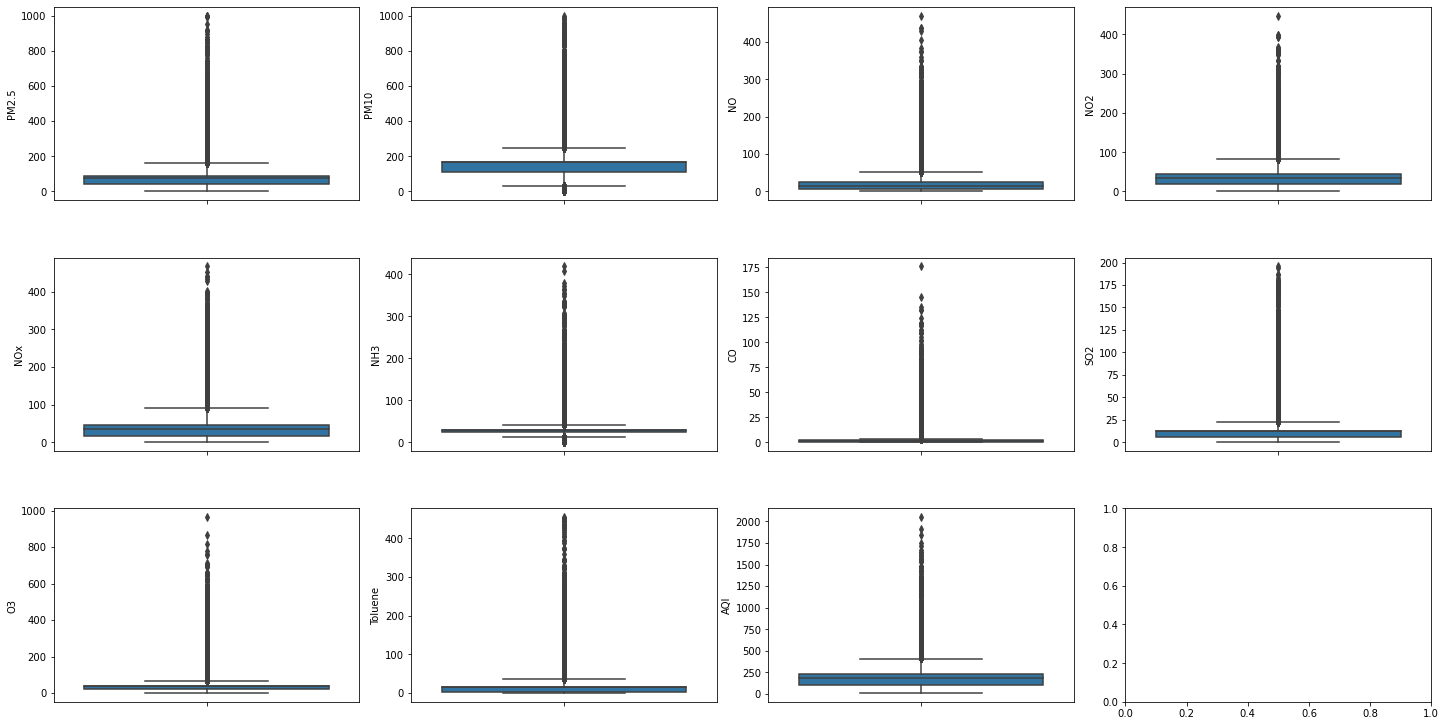

In [18]:
# to check for outliers
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten() # converting 2d to 1d
for k,v in df.items():
    sns.boxplot(y=v, ax=axs[index]) 
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [19]:
# to handle outliers in medv,target
data = df[~(df['AQI'] >=320)]
data

PM2.5    PM10    NO    NO2    NOx    NH3    CO    SO2      O3  Toluene  \
0      71.36  115.75  1.75  20.65  12.40  12.19  0.10  10.76  109.26     5.92   
1      81.40  124.50  1.44  20.50  12.08  10.72  0.12  15.24  127.09     6.50   
2      78.32  129.06  1.26  26.00  14.85  10.28  0.14  26.96  117.44     7.95   
3      88.76  135.32  6.60  30.85  21.77  12.91  0.11  33.59  111.81     7.63   
4      64.18  104.09  2.56  28.07  17.01  11.42  0.09  19.00  138.18     5.02   
...      ...     ...   ...    ...    ...    ...   ...    ...     ...      ...   
99716  11.51   31.71  1.73  10.21  11.93  21.52  0.54   6.92   28.90     8.96   
99717   9.38   33.70  1.77  12.39  14.15  22.44  0.64   6.09   26.34     9.47   
99718  16.86   32.17  2.00  14.26  16.27  24.19  0.57   7.27   29.62    10.45   
99719  15.17   32.10  2.02  12.40  14.41  25.58  0.61  11.53   33.93     8.92   
99720  17.05   29.15  1.70  10.54  12.22  24.21  0.65   6.51   23.48     7.91   

              AQI  
0      187.122347  
1      184.000000  
2      197.000000  
3      198.000000  
4      188.000000  
...           ...  
99716   38.000000  
99717   39.000000  
99718   44.000000  
99719   46.000000  
99720   57.000000  

[85951 rows x 11 columns]

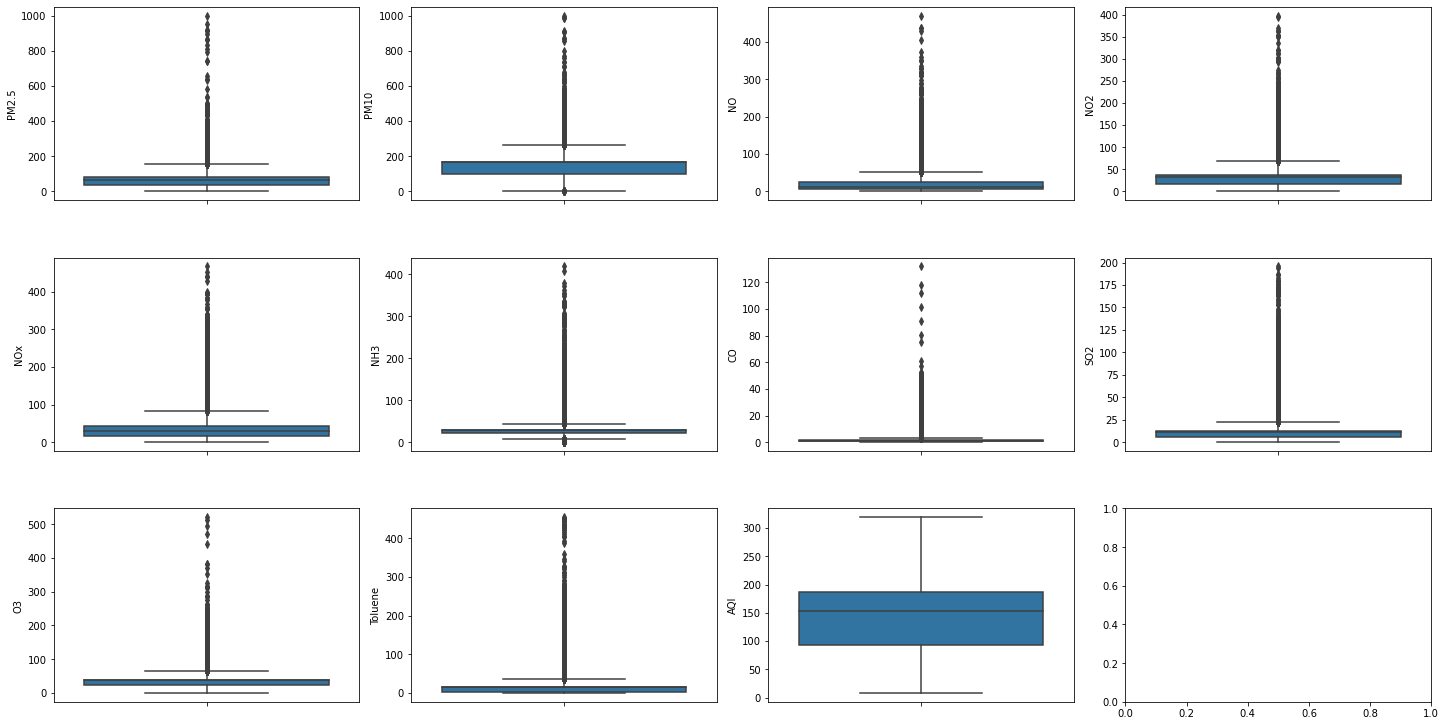

In [20]:
# to check for outliers
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten() # converting 2d to 1d
for k,v in data.items():
    sns.boxplot(y=v, ax=axs[index]) 
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [21]:
data.shape

(85951, 11)

In [22]:
data.corr()

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PM2.5    1.000000  0.570532  0.300099  0.350503  0.275506  0.208703  0.065162   
PM10     0.570532  1.000000  0.281655  0.314975  0.278696  0.257633  0.108761   
NO       0.300099  0.281655  1.000000  0.499586  0.765920  0.156493  0.072255   
NO2      0.350503  0.314975  0.499586  1.000000  0.625418  0.225929  0.051724   
NOx      0.275506  0.278696  0.765920  0.625418  1.000000  0.157956  0.075100   
NH3      0.208703  0.257633  0.156493  0.225929  0.157956  1.000000  0.049757   
CO       0.065162  0.108761  0.072255  0.051724  0.075100  0.049757  1.000000   
SO2      0.178324  0.190266  0.135538  0.183818  0.142119  0.034782  0.136793   
O3       0.122317  0.062510 -0.054248  0.162348  0.029562  0.056408 -0.013498   
Toluene  0.098976  0.094452  0.136997  0.180904  0.146210  0.041195  0.044754   
AQI      0.722305  0.633210  0.337877  0.374505  0.335632  0.212657  0.153539   

              SO2        O3   Toluene       AQI  
PM2.5    0.178324  0.122317  0.098976  0.722305  
PM10     0.190266  0.062510  0.094452  0.633210  
NO       0.135538 -0.054248  0.136997  0.337877  
NO2      0.183818  0.162348  0.180904  0.374505  
NOx      0.142119  0.029562  0.146210  0.335632  
NH3      0.034782  0.056408  0.041195  0.212657  
CO       0.136793 -0.013498  0.044754  0.153539  
SO2      1.000000  0.131153  0.124770  0.244308  
O3       0.131153  1.000000  0.026100  0.231931  
Toluene  0.124770  0.026100  1.000000  0.121778  
AQI      0.244308  0.231931  0.121778  1.000000

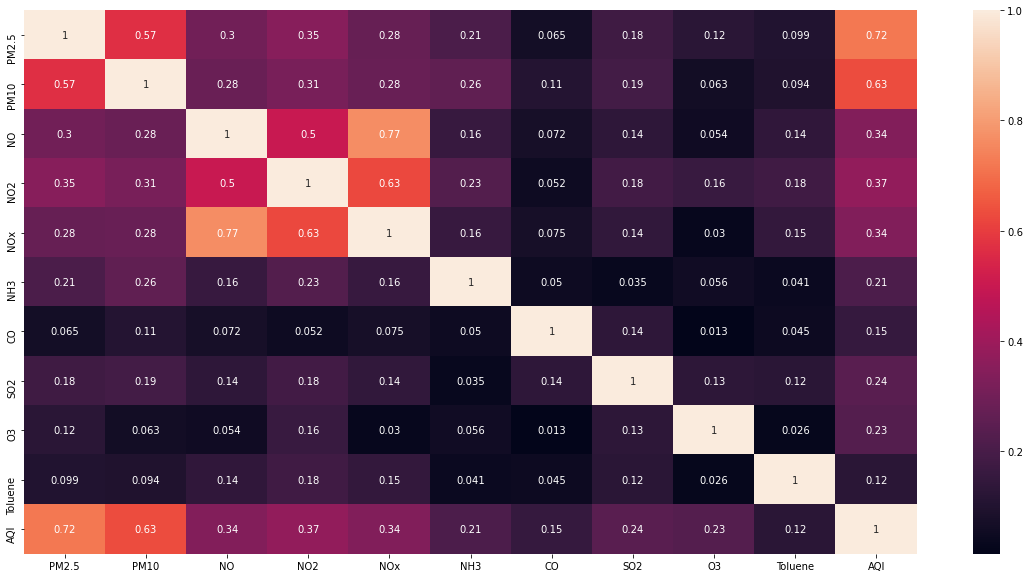

In [23]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)
plt.show()

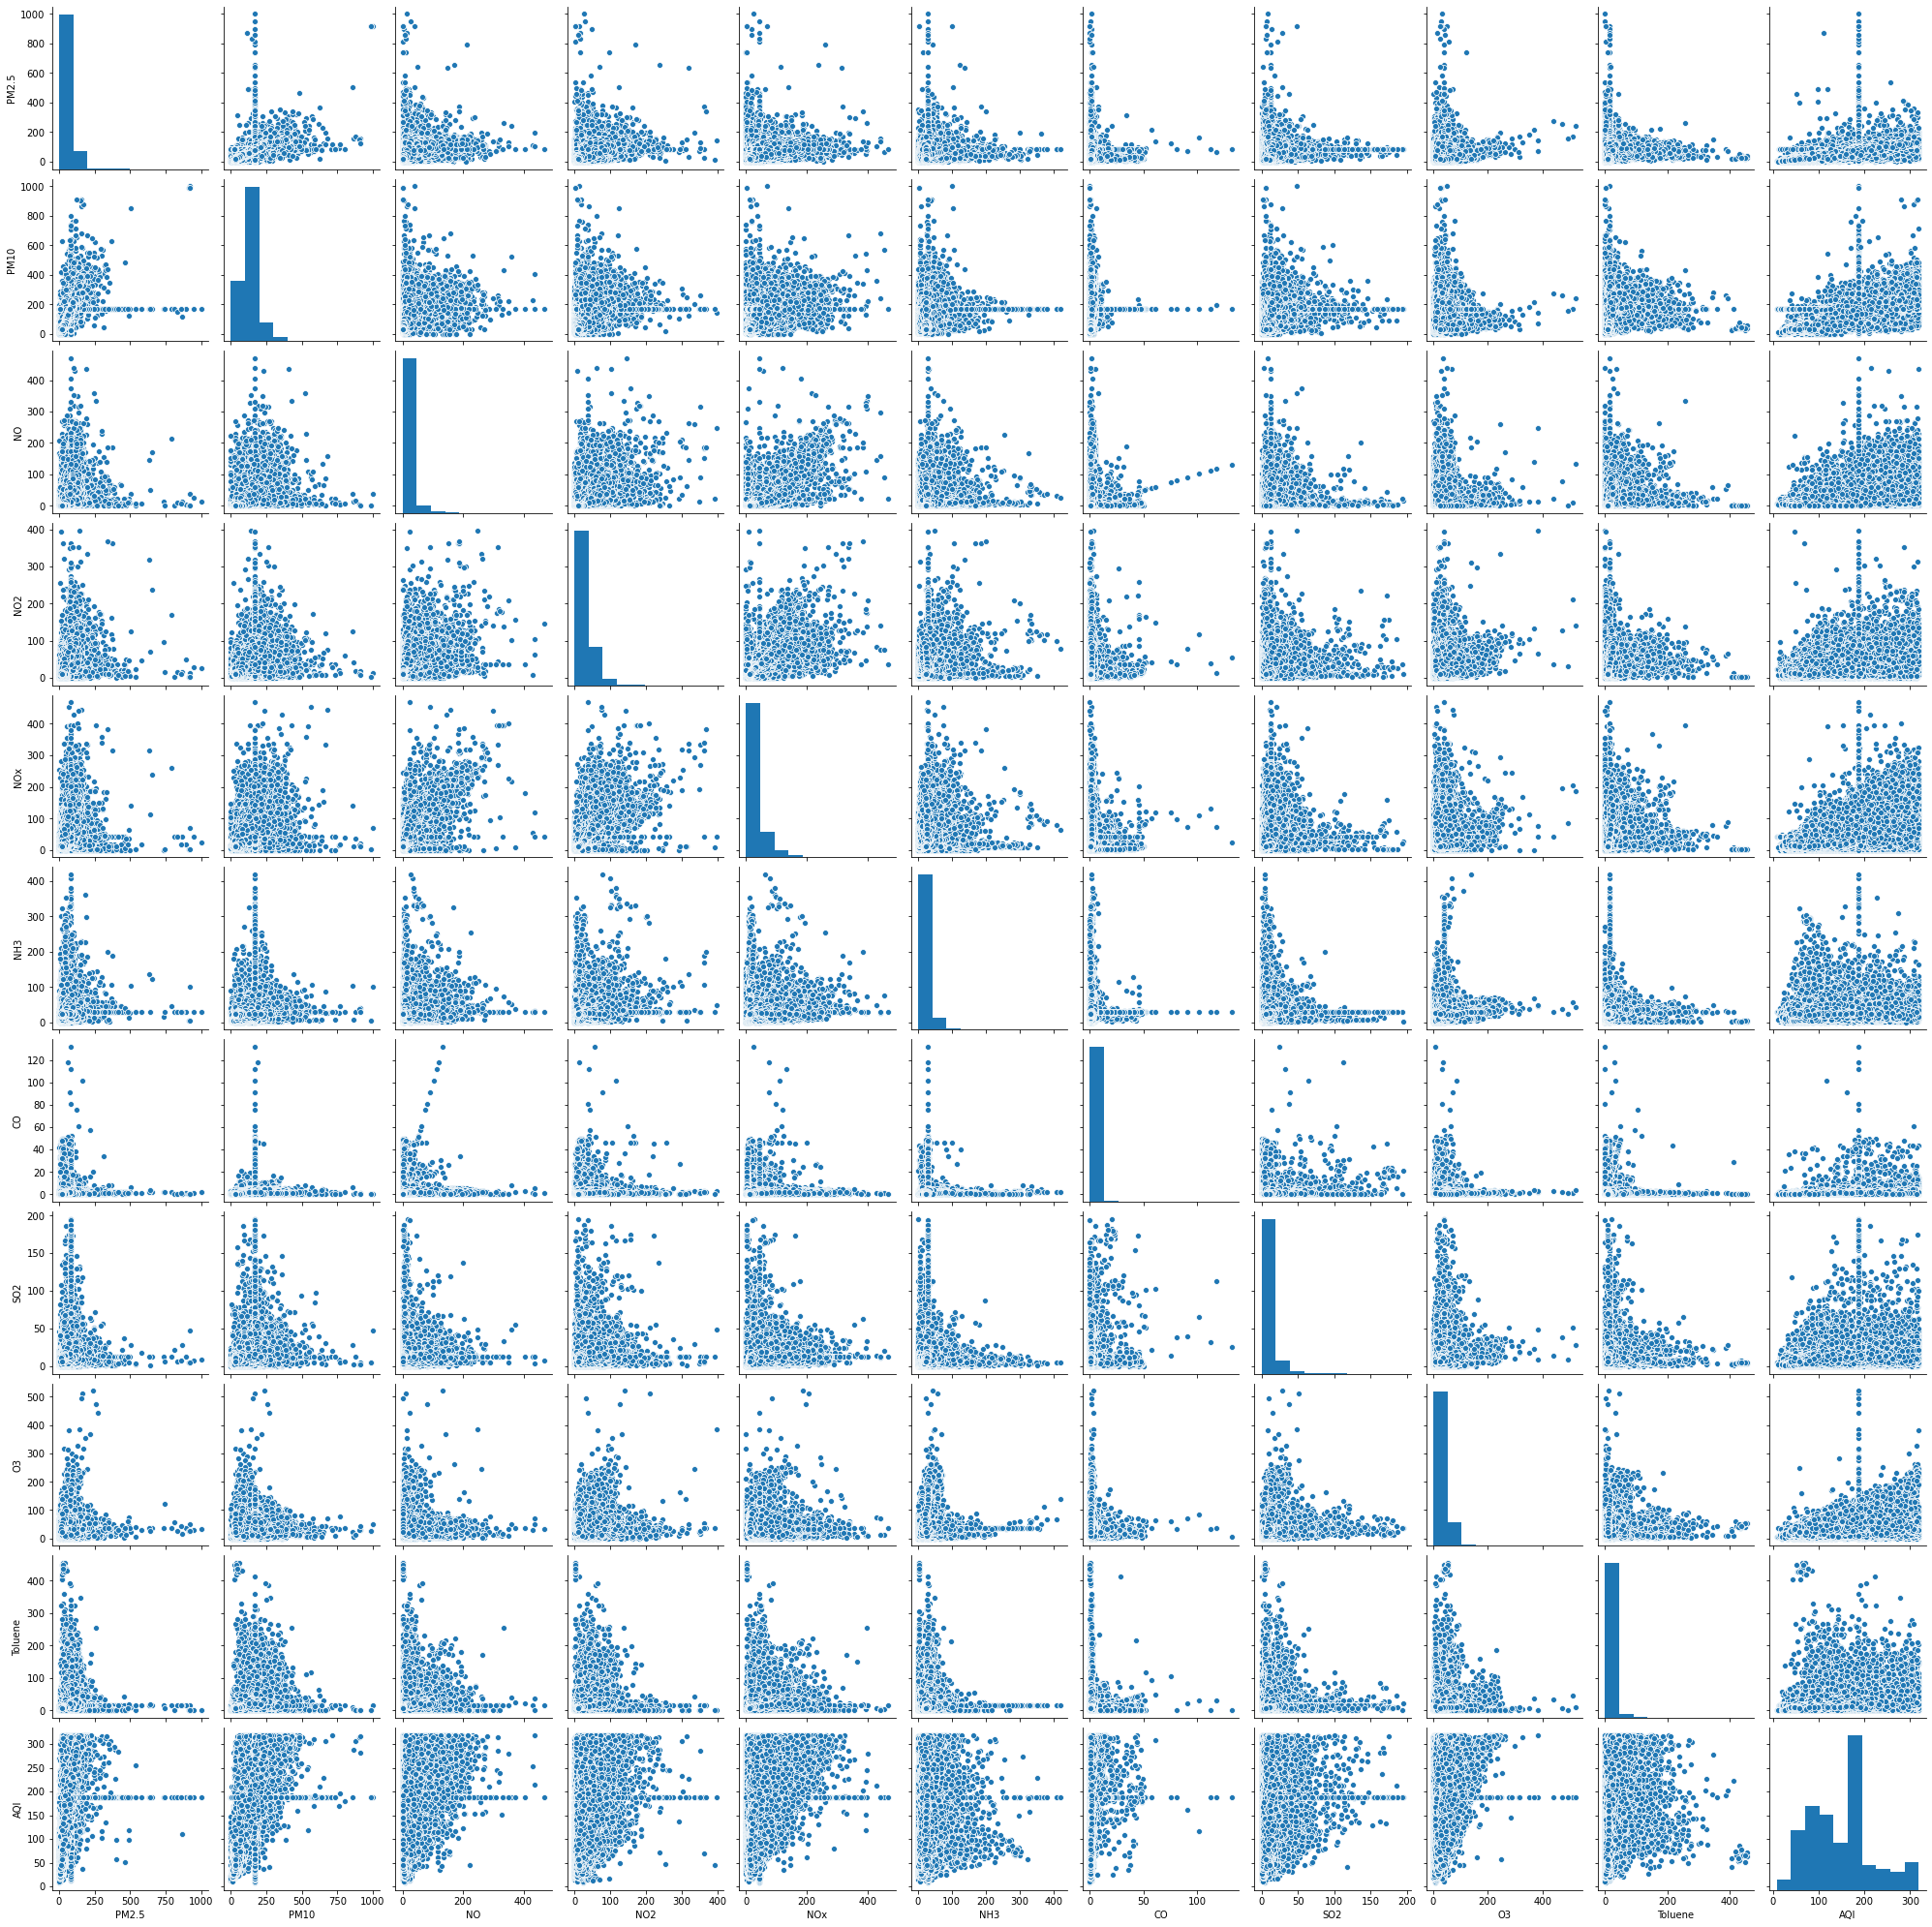

In [24]:
sns.pairplot(data)

In [25]:
# to remove the normalization factors
from sklearn.preprocessing import StandardScaler
# Let's scale the columns before plotting them against MEDV
sc = StandardScaler()
# these columns only to be used
column_sels = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Toluene']
x = data.loc[:,column_sels]
y = data['AQI']
#y_std=sc.StandardScaler(y), if not deleting the outliers
data1=sc.fit_transform(x)
x = pd.DataFrame(data1, columns=column_sels)



In [26]:
x

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
0      0.178023 -0.447249 -0.736450 -0.528146 -0.725944 -0.927131 -0.473656   
1      0.450133 -0.309224 -0.749544 -0.534739 -0.735567 -1.012423 -0.465673   
2      0.366657 -0.237293 -0.757147 -0.293019 -0.652262 -1.037953 -0.457690   
3      0.649608 -0.138545 -0.531588 -0.079865 -0.444150 -0.885355 -0.469665   
4     -0.016574 -0.631178 -0.702236 -0.202044 -0.587302 -0.971808 -0.477648   
...         ...       ...       ...       ...       ...       ...       ...   
85946 -1.444069 -1.772923 -0.737294 -0.986975 -0.740079 -0.385787 -0.298025   
85947 -1.501797 -1.741532 -0.735605 -0.891166 -0.673314 -0.332407 -0.258108   
85948 -1.299070 -1.765667 -0.725890 -0.808981 -0.609557 -0.230868 -0.286050   
85949 -1.344873 -1.766771 -0.725045 -0.890727 -0.665495 -0.150218 -0.270083   
85950 -1.293920 -1.813306 -0.738562 -0.972472 -0.731357 -0.229708 -0.254117   

            SO2        O3   Toluene  
0     -0.064648  3.282180 -0.383391  
1      0.399062  4.087538 -0.354705  
2      1.612162  3.651660 -0.282990  
3      2.298412  3.397360 -0.298817  
4      0.788248  4.588458 -0.427904  
...         ...       ...       ...  
85946 -0.462114 -0.347573 -0.233036  
85947 -0.548025 -0.463205 -0.207812  
85948 -0.425887 -0.315052 -0.159343  
85949  0.015052 -0.120375 -0.235015  
85950 -0.504552 -0.592387 -0.284968  

[85951 rows x 10 columns]

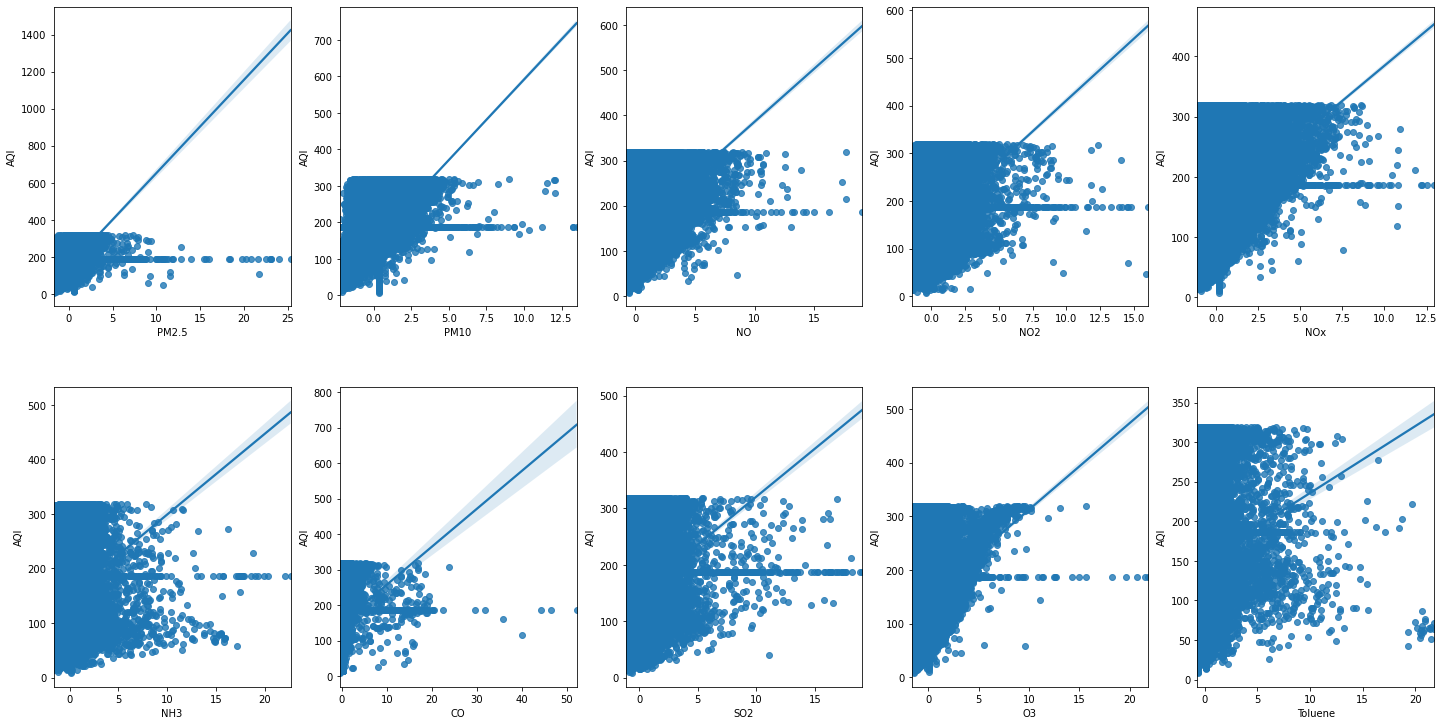

In [27]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [28]:

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=0)

In [29]:
regression_tree = DecisionTreeRegressor(min_samples_split=.12)
regression_tree.fit(X_train,y_train)
y_pred=regression_tree.predict(X_test)

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7514857264250616

In [31]:
regression_tree.score(X_train,y_train)   # overfitting 

0.7463676479593868

In [38]:
regressor = RandomForestRegressor(n_estimators = 200, random_state=0,min_samples_split=.12)
regressor.fit(X_train,y_train)
y_pred_rf=regressor.predict(X_test)

In [39]:
r2_score(y_test,y_pred_rf)

0.752696212787149

In [40]:
regressor.score(X_train,y_train)

0.7493345783589178